In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles

Note: you may need to restart the kernel to use updated packages.


In [2]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)

# convert to numeric what is possible
results_2019 = results_2019.apply(pd.to_numeric, errors='coerce').fillna(results_2019)
results_2020 = results_2020.apply(pd.to_numeric, errors='coerce').fillna(results_2020)
results_2021 = results_2021.apply(pd.to_numeric, errors='coerce').fillna(results_2021)

# replace NaNs with empty strings for easier searchability
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)

C:\Users\cseke\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.set_option('display.max_columns', None)
display(results_2021.head())
print(results_2021.columns)

,id,county_rank,country_rank,high_school,county,prev_promotion,school_type,specialization,romanian_competency,romanian_written,romanian_written_appeal,romanian_written_final,mother_tongue,mother_tongue_competency,mother_tongue_written,mother_tongue_written_appeal,mother_tongue_written_final,modern_language,modern_language_results,mandatory_subject,mandatory_subject_written,mandatory_subject_written_appeal,mandatory_subject_written_final,elective_subject,elective_subject_written,elective_subject_written_appeal,elective_subject_written_final,digital_competencies,final_grade,successful
0,AB1000328,1866,95288,"COLEGIUL TEHNIC ""APULUM"" ALBA IULIA",AB,DA,ZI,TEHNICIAN DESIGNER VESTIMENTAR,Utilizator nivel mediu,5.05,,5.05,,,,,,LIMBA ENGLEZA,A2-A2-A2-A2-A2,MATEMATICA TEHN,2.95,,2.95,BIOLOGIE VEGETALA SI ANIMALA,7.80,,7.80,Utilizator avansat,,RESPINS
1,AB1005434,1867,95289,"LICEUL TEOLOGIC ROMANO-CATOLIC ""GROF MAJLATH ...",AB,DA,ZI,TEOLOGIE ROMANO-CATOLICA,Utilizator nivel mediu,3.70,4.45,4.45,LIMBA MAGHIARA (REAL),Utilizator avansat,7.55,,7.55,LIMBA ENGLEZA,B1-B1-B1-B1-B1,ISTORIE,9.35,,9.35,FILOSOFIE,7.30,,7.30,Utilizator experimentat,,RESPINS
2,AB1007560,1728,87156,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,6.05,,6.05,,,,,,LIMBA ENGLEZA,B2-B2-B2-B2-B2,MATEMATICA MATE-INFO,5.35,,5.35,"ANATOMIE SI FIZIOLOGIE UMANA, GENETICA SI ECO...",6.75,,6.75,Utilizator experimentat,6.05,REUSIT
3,AB1007648,1868,95290,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,6.15,,6.15,,,,,,LIMBA ENGLEZA,B1-B1-B1-B1-B1,MATEMATICA MATE-INFO,3.80,3.2,3.20,"ANATOMIE SI FIZIOLOGIE UMANA, GENETICA SI ECO...",5.75,,5.75,Utilizator experimentat,,RESPINS
4,AB1008259,1767,89406,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,5.50,,5.50,,,,,,LIMBA ENGLEZA,A2-A2-A2-A2-A2,MATEMATICA MATE-INFO,5.80,,5.80,FIZICA TEO,6.55,6.4,6.40,Utilizator experimentat,5.9,RESPINS


Index(['id', 'county_rank', 'country_rank', 'high_school', 'county',
       'prev_promotion', 'school_type', 'specialization',
       'romanian_competency', 'romanian_written', 'romanian_written_appeal',
       'romanian_written_final', 'mother_tongue', 'mother_tongue_competency',
       'mother_tongue_written', 'mother_tongue_written_appeal',
       'mother_tongue_written_final', 'modern_language',
       'modern_language_results', 'mandatory_subject',
       'mandatory_subject_written', 'mandatory_subject_written_appeal',
       'mandatory_subject_written_final', 'elective_subject',
       'elective_subject_written', 'elective_subject_written_appeal',
       'elective_subject_written_final', 'digital_competencies', 'final_grade',
       'successful'],
      dtype='object')


In [4]:
nr_romanian_only = len(results_2021[results_2021['mother_tongue'] == ''])
nr_romanian_plus = len(results_2021[results_2021['mother_tongue'] != ''])
print(nr_romanian_only)
print(nr_romanian_plus)
print(nr_romanian_only + nr_romanian_plus)

127091
6573
133664


In [5]:
# Number of people that took each mother tongue exam in 2021.

display(results_2021[results_2021['mother_tongue'] != ''].groupby(['mother_tongue']).size().reset_index(name='count'))
# display(results_2020[results_2020['mother_tongue'] != ''].groupby(['mother_tongue']).size().reset_index(name='count'))
# display(results_2019[results_2019['mother_tongue'] != ''].groupby(['mother_tongue']).size().reset_index(name='count'))

,mother_tongue,count
0,LIMBA CROATA,4
1,LIMBA GERMANA,728
2,LIMBA ITALIANA,32
3,LIMBA MAGHIARA (REAL),4476
4,LIMBA MAGHIARA (UMAN),1194
5,LIMBA SARBA,17
6,LIMBA SLOVACA,21
7,LIMBA TURCA,4
8,LIMBA UCRAINEANA,97


In [6]:
# What is the average final written Romanian grade of those who did not take a separate exam in their native language?
# What is the average of those who did?

# Grade -2.0 means that the student did not participate at the exam.
# Grade -1.0 means that the student was banned from continuing to take the exam.
# I will not include these cases when calculating the average.
romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] > -1)]
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] > -1)]

# Checking that after filtering, the minimum grade is truly no less than 1.0.
assert(min(romanian_only_results['romanian_written_final'].drop_duplicates().to_list()) >= 1.0)
assert(min(romanian_plus_results['romanian_written_final'].drop_duplicates().to_list()) >= 1.0)

print("Romanians' average Romanian: " + str(romanian_only_results['romanian_written_final'].mean()))
print("Minorities' average Romanian: " + str(romanian_plus_results['romanian_written_final'].mean()))

Romanians' average Romanian: 7.06018228028413
Minorities' average Romanian: 5.744183625912699


In [7]:
# What is the total average grade of the Romanians and the minorities?
# Remove grades -2.0 and -1.0 in other subjects.

romanian_only_results_filtered = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_filtered = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0) & (romanian_plus_results['mother_tongue_written_final'] >= 1.0)].copy()

romanian_only_columns = ['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']
romanian_plus_columns = ['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final']
romanian_only_results_filtered.loc[:, 'total_average'] = romanian_only_results_filtered.loc[:, romanian_only_columns].mean(axis=1)
romanian_plus_results_filtered.loc[:, 'total_average'] = romanian_plus_results_filtered.loc[:, romanian_plus_columns].mean(axis=1)

print("Romanians' average grade: " + str(romanian_only_results_filtered['total_average'].mean()))
print("Minorities' average grade: " + str(romanian_plus_results_filtered['total_average'].mean()))

Romanians' average grade: 7.029718081103255
Minorities' average grade: 7.012912944679516


In [8]:
# What is the average native tongue grade?
# Select the students who have a non -2 and -1 grade in their native tongue.

native_tongue_results = results_2021[(results_2021['mother_tongue'] != '')].copy()
native_tongue_results.loc[:, 'mother_tongue_written_final'] = pd.to_numeric(native_tongue_results.loc[:, 'mother_tongue_written_final'])
native_tongue_results = native_tongue_results[(native_tongue_results['mother_tongue_written_final'] > -1)]
print("Average in native tongue subject: " + str(native_tongue_results['mother_tongue_written_final'].mean()))

Average in native tongue subject: 7.797580620274658


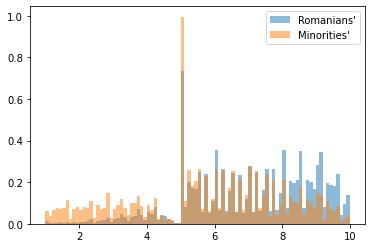

In [9]:
# Let's plot the final written Romanian grades.

plt.hist(romanian_only_results['romanian_written_final'].to_list(), bins=90, density=True, alpha = 0.5)
plt.hist(romanian_plus_results['romanian_written_final'].to_list(), bins=90, density=True, alpha = 0.5)
plt.legend(["Romanians'", "Minorities'"])
plt.show()

# There are very few grades between 4 and 5, probably because the teachers want people to pass.

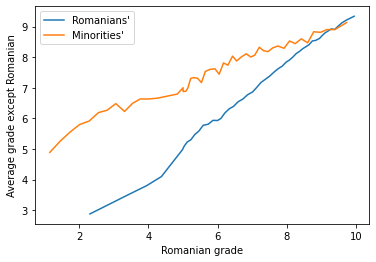

In [10]:
# Do students who get a higher grade in other subjects also get a higher grade in Romanian?
# Is the Romanian grade a good predictor of the average of the other subjects?

# Remove students who either got disqualified or did not attend one of the exams.
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0) & (romanian_plus_results['mother_tongue_written_final'] >= 1.0)]

# Create a new column with the average of all the subjects except the Romanian grade. Sort by the average grade.

def append_average_of_columns(results, columns):
    results['written_average_except_romanian'] = results[columns].mean(axis=1)
    return results.sort_values('romanian_written_final')

romanian_only_results_valid = append_average_of_columns(romanian_only_results_valid.copy(), ['mandatory_subject_written_final', 'elective_subject_written_final'])
romanian_plus_results_valid = append_average_of_columns(romanian_plus_results_valid.copy(), ['mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final'])

# display(romanian_only_results_valid.groupby(['written_average_except_romanian']).size().reset_index(name='count'))
# As the number of different average grades varies is a lot, they should not simply be plotted against the
# average Romanian grade for each bucket. Instead, students are grouped into 20 groups by their average grades.

number_buckets = 50
romanian_only_results_valid_chunks = np.array_split(romanian_only_results_valid, number_buckets)
romanian_plus_results_valid_chunks = np.array_split(romanian_plus_results_valid, number_buckets)

def mean_grade(results_chunk, grade_category):
    return results_chunk[grade_category].mean()

romanian_grade = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_only_results_valid_chunks]
average_grade_except_romanian = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_only_results_valid_chunks]
romanian_grade_minorities = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_plus_results_valid_chunks]
average_grade_except_romanian_minorities = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_plus_results_valid_chunks]

# In this plot, the students are grouped based on their average grade except Romanian.
# The groups of students are of the same size.
plt.plot(romanian_grade, average_grade_except_romanian)
plt.plot(romanian_grade_minorities, average_grade_except_romanian_minorities)
plt.legend(["Romanians'", "Minorities'"])
plt.xlabel('Romanian grade')
plt.ylabel('Average grade except Romanian')
plt.show()

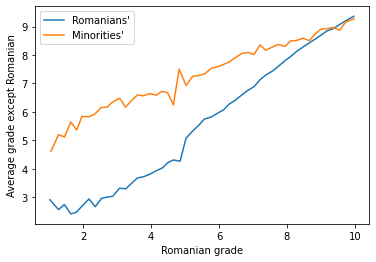

In [11]:
# Now let's create groups based on the range of possible grades, thus having groups of students of varying sizes.

number_buckets = 50
grade_limits = np.linspace(1, 10, number_buckets + 1)
grade_limits = [[grade_limits[i], grade_limits[i + 1]] for i in range(number_buckets)]
grade_limits[-1][1] = 10.1

romanian_only_results_valid_chunks = [romanian_only_results_valid[(grade_limits[i][0] <= romanian_only_results_valid['romanian_written_final']) & (romanian_only_results_valid['romanian_written_final'] < grade_limits[i][1])] for i in range(number_buckets)]
romanian_plus_results_valid_chunks = [romanian_plus_results_valid[(grade_limits[i][0] <= romanian_plus_results_valid['romanian_written_final']) & (romanian_plus_results_valid['romanian_written_final'] < grade_limits[i][1])] for i in range(number_buckets)]

romanian_grade = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_only_results_valid_chunks]
average_grade_except_romanian = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_only_results_valid_chunks]
romanian_grade_minorities = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_plus_results_valid_chunks]
average_grade_except_romanian_minorities = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_plus_results_valid_chunks]

plt.plot(romanian_grade, average_grade_except_romanian)
plt.plot(romanian_grade_minorities, average_grade_except_romanian_minorities)
plt.legend(["Romanians'", "Minorities'"])
plt.xlabel('Romanian grade')
plt.ylabel('Average grade except Romanian')
plt.show()

# Good linear predictors can be found

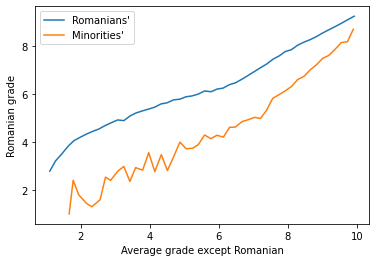

In [12]:
# Reverse the problem: predicting from the average grade except Romanian the Romanian grade

number_buckets = 50
grade_limits = np.linspace(1, 10, number_buckets + 1)
grade_limits = [[grade_limits[i], grade_limits[i + 1]] for i in range(number_buckets)]
grade_limits[-1][1] = 10.1

romanian_only_results_valid_chunks = [romanian_only_results_valid[(grade_limits[i][0] <= romanian_only_results_valid['written_average_except_romanian']) & (romanian_only_results_valid['written_average_except_romanian'] < grade_limits[i][1])] for i in range(number_buckets)]
romanian_plus_results_valid_chunks = [romanian_plus_results_valid[(grade_limits[i][0] <= romanian_plus_results_valid['written_average_except_romanian']) & (romanian_plus_results_valid['written_average_except_romanian'] < grade_limits[i][1])] for i in range(number_buckets)]

romanian_grade = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_only_results_valid_chunks]
average_grade_except_romanian = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_only_results_valid_chunks]
romanian_grade_minorities = [mean_grade(chunk, 'romanian_written_final') for chunk in romanian_plus_results_valid_chunks]
average_grade_except_romanian_minorities = [mean_grade(chunk, 'written_average_except_romanian') for chunk in romanian_plus_results_valid_chunks]

plt.plot(average_grade_except_romanian, romanian_grade)
plt.plot(average_grade_except_romanian_minorities, romanian_grade_minorities)
plt.legend(["Romanians'", "Minorities'"])
plt.xlabel('Average grade except Romanian')
plt.ylabel('Romanian grade')
plt.show()

In [13]:
# Number of minorities in each year and their average final grades

results_2019_filtered = results_2019[results_2019[['romanian_written_final', 'mother_tongue_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
results_2020_filtered = results_2020[results_2020[['romanian_written_final', 'mother_tongue_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_2021_filtered = results_2021[results_2021[['romanian_written_final', 'mother_tongue_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]

def group_results(results, group):
    if group == 'r':
        return results[results['mother_tongue'] == '']
    return results[results['mother_tongue'] != '']

results_2019_r = group_results(results_2019_filtered, 'r')
results_2019_m = group_results(results_2019_filtered, 'm')
results_2020_r = group_results(results_2020_filtered, 'r')
results_2020_m = group_results(results_2020_filtered, 'm')
results_2021_r = group_results(results_2021_filtered, 'r')
results_2021_m = group_results(results_2021_filtered, 'm')

print('Nr of Romanians in 2019: ' + str(len(results_2019_r)))
print('Nr of Minorities in 2019: ' + str(len(results_2019_m)))
print('Nr of Romanians in 2020: ' + str(len(results_2020_r)))
print('Nr of Minorities in 2020: ' + str(len(results_2020_m)))
print('Nr of Romanians in 2021: ' + str(len(results_2021_r)))
print('Nr of Minorities in 2021: ' + str(len(results_2021_m)))
print('Nr of Romanians: ' + str(len(results_2019_r) + len(results_2020_r) + len(results_2021_r)))
print('Nr of Minorities: ' + str(len(results_2019_m) + len(results_2020_m) + len(results_2020_m)))

def group_mean(results, group):
    if group == 'r':
        return results[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1).mean()
    return results[['romanian_written_final', 'mother_tongue_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1).mean()

mean_2019_r = group_mean(results_2019_r, 'r')
mean_2019_m = group_mean(results_2019_m, 'm')
mean_2020_r = group_mean(results_2020_r, 'r')
mean_2020_m = group_mean(results_2020_m, 'm')
mean_2021_r = group_mean(results_2021_r, 'r')
mean_2021_m = group_mean(results_2021_m, 'm')

print()
print('Mean of Romanians in 2019: ' + str(mean_2019_r))
print('Mean of Minorities in 2019: ' + str(mean_2019_m))
print('Mean of Romanians in 2020: ' + str(mean_2020_r))
print('Mean of Minorities in 2020: ' + str(mean_2020_m))
print('Mean of Romanians in 2021: ' + str(mean_2021_r))
print('Mean of Minorities in 2021: ' + str(mean_2021_m))

mean_r = (len(results_2019_r) * mean_2019_r + len(results_2020_r) * mean_2020_r + len(results_2021_r) * mean_2021_r) / (len(results_2019_r) + len(results_2020_r) + len(results_2021_r))
mean_m = (len(results_2019_m) * mean_2019_m + len(results_2020_m) * mean_2020_m + len(results_2021_m) * mean_2021_m) / (len(results_2019_m) + len(results_2020_m) + len(results_2021_m))

print('Mean of Romanians: ' + str(mean_r))
print('Mean of Minorities: ' + str(mean_m))

Nr of Romanians in 2019: 121693
Nr of Minorities in 2019: 6826
Nr of Romanians in 2020: 140315
Nr of Minorities in 2020: 7351
Nr of Romanians in 2021: 120472
Nr of Minorities in 2021: 6381
Nr of Romanians: 382480
Nr of Minorities: 21528

Mean of Romanians in 2019: 7.006935156500431
Mean of Minorities in 2019: 6.868482273659519
Mean of Romanians in 2020: 6.819968451935652
Mean of Minorities in 2020: 6.99438409740171
Mean of Romanians in 2021: 7.029718081103255
Mean of Minorities in 2021: 7.012912944679516
Mean of Romanians: 6.94552141288441
Mean of Minorities: 6.958331306547321


In [14]:
# Compute Cohen's d for the two means.

results_r = pd.concat([results_2019_r, results_2020_r, results_2021_r])
results_m = pd.concat([results_2019_m, results_2020_m, results_2021_m])
results_r.loc[:, 'average_written'] = results_r[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)
results_m.loc[:, 'average_written'] = results_m[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final']].mean(axis=1)

def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    s1 = np.std(x1, ddof=1)
    s2 = np.std(x2, ddof=1)
    pooled_std = np.sqrt((((n1 - 1) * s1 ** 2) + ((n1 - 1) * s1 ** 2)) / (n1 + n2 - 2))
    return (np.mean(x1) - np.mean(x2)) / pooled_std

print(cohen_d(results_m['average_written'].to_numpy(), results_r['average_written'].to_numpy()))

0.02495652696794291


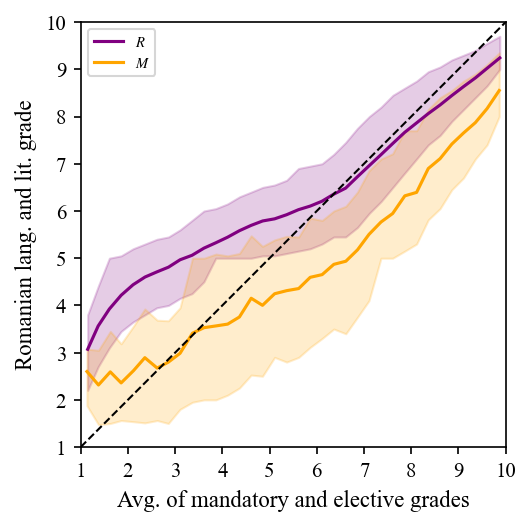

In [3]:
# Plot the average of the mandatory and elective grades against the Romanian grade

results_2019_filtered = results_2019[results_2019[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
results_2020_filtered = results_2020[results_2020[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_2021_filtered = results_2021[results_2021[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_filtered = pd.concat([results_2019_filtered, results_2020_filtered, results_2021_filtered])

results_filtered.loc[:, 'mandatory_elective_average'] = results_filtered[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)
results_filtered_r = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x == '').all(1)]
results_filtered_m = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x != '').all(1)]

number_buckets = 36
grade_limits = np.linspace(1, 10, number_buckets + 1)
grade_limits = [[grade_limits[i], grade_limits[i + 1]] for i in range(number_buckets)]
grade_limits[-1][1] = 10.1

results_chunks_r = [results_filtered_r[(grade_limits[i][0] <= results_filtered_r['mandatory_elective_average']) & (results_filtered_r['mandatory_elective_average'] < grade_limits[i][1])] for i in range(number_buckets)]
results_chunks_m = [results_filtered_m[(grade_limits[i][0] <= results_filtered_m['mandatory_elective_average']) & (results_filtered_m['mandatory_elective_average'] < grade_limits[i][1])] for i in range(number_buckets)]

lower_romanian_r = [np.percentile(chunk['romanian_written_final'], 25) for chunk in results_chunks_r]
upper_romanian_r = [np.percentile(chunk['romanian_written_final'], 75) for chunk in results_chunks_r]
lower_romanian_m = [np.percentile(chunk['romanian_written_final'], 25) for chunk in results_chunks_m]
upper_romanian_m = [np.percentile(chunk['romanian_written_final'], 75) for chunk in results_chunks_m]

mandatory_elective_r = [chunk['mandatory_elective_average'].mean() for chunk in results_chunks_r]
mandatory_elective_m = [chunk['mandatory_elective_average'].mean() for chunk in results_chunks_m]
romanian_r = [chunk['romanian_written_final'].mean() for chunk in results_chunks_r]
romanian_m = [chunk['romanian_written_final'].mean() for chunk in results_chunks_m]

end_points_x = [1, 10]
end_points_y = [1, 10]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.fill_between(mandatory_elective_r, lower_romanian_r, upper_romanian_r, alpha=0.2, color='purple')
    ax.fill_between(mandatory_elective_m, lower_romanian_m, upper_romanian_m, alpha=0.2, color='orange')
    ax.plot(mandatory_elective_r, romanian_r, color='purple')
    ax.plot(mandatory_elective_m, romanian_m, color='orange')

    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.legend(["$\it{R}$", "$\it{M}$"])
    ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    ax.set_ylabel("Romanian lang. and lit. grade", fontsize=11)
    ax.set_xticks(np.arange(1,11))
    ax.set_xticklabels(np.arange(1,11), fontsize=10)
    ax.set_yticks(np.arange(1,11))
    ax.set_yticklabels(np.arange(1,11), fontsize=10)


    plt.show()
    fig.savefig('../doc/plots/exp1_grade_plot.pdf', bbox_inches='tight')


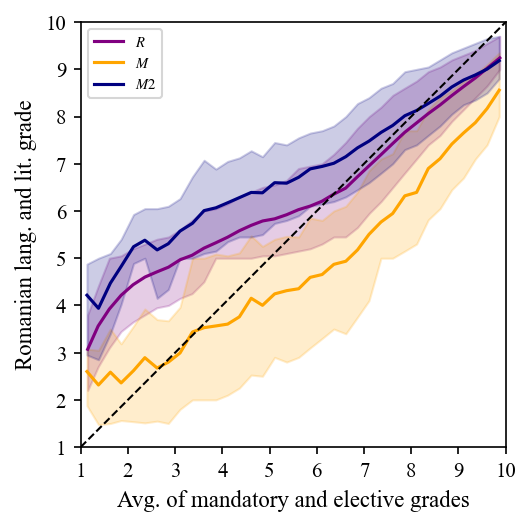

In [18]:
# Plot the average of the language and literature grades

results_2019_filtered = results_2019[results_2019[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
results_2020_filtered = results_2020[results_2020[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_2021_filtered = results_2021[results_2021[['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final', 'mother_tongue_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_filtered = pd.concat([results_2019_filtered, results_2020_filtered, results_2021_filtered])

results_filtered.loc[:, 'mandatory_elective_average'] = results_filtered[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)
results_filtered_r = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x == '').all(1)]
results_filtered_m = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x != '').all(1)]

number_buckets = 36
grade_limits = np.linspace(1, 10, number_buckets + 1)
grade_limits = [[grade_limits[i], grade_limits[i + 1]] for i in range(number_buckets)]
grade_limits[-1][1] = 10.1

results_chunks_r = [results_filtered_r[(grade_limits[i][0] <= results_filtered_r['mandatory_elective_average']) & (results_filtered_r['mandatory_elective_average'] < grade_limits[i][1])] for i in range(number_buckets)]
results_chunks_m = [results_filtered_m[(grade_limits[i][0] <= results_filtered_m['mandatory_elective_average']) & (results_filtered_m['mandatory_elective_average'] < grade_limits[i][1])] for i in range(number_buckets)]

lower_romanian_r = [np.percentile(chunk['romanian_written_final'], 25) for chunk in results_chunks_r]
upper_romanian_r = [np.percentile(chunk['romanian_written_final'], 75) for chunk in results_chunks_r]
lower_romanian_m = [np.percentile(chunk['romanian_written_final'], 25) for chunk in results_chunks_m]
upper_romanian_m = [np.percentile(chunk['romanian_written_final'], 75) for chunk in results_chunks_m]
lower_native_m = [np.percentile(chunk['mother_tongue_written_final'], 25) for chunk in results_chunks_m]
upper_native_m = [np.percentile(chunk['mother_tongue_written_final'], 75) for chunk in results_chunks_m]

mandatory_elective_r = [chunk['mandatory_elective_average'].mean() for chunk in results_chunks_r]
mandatory_elective_m = [chunk['mandatory_elective_average'].mean() for chunk in results_chunks_m]
romanian_r = [chunk['romanian_written_final'].mean() for chunk in results_chunks_r]
romanian_m = [chunk['romanian_written_final'].mean() for chunk in results_chunks_m]
native_m = [chunk['mother_tongue_written_final'].mean() for chunk in results_chunks_m]

end_points_x = [1, 10]
end_points_y = [1, 10]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.fill_between(mandatory_elective_r, lower_romanian_r, upper_romanian_r, alpha=0.2, color='purple')
    ax.fill_between(mandatory_elective_m, lower_romanian_m, upper_romanian_m, alpha=0.2, color='orange')
    ax.fill_between(mandatory_elective_m, lower_native_m, upper_native_m, alpha=0.2, color='navy')
    ax.plot(mandatory_elective_r, romanian_r, color='purple')
    ax.plot(mandatory_elective_m, romanian_m, color='orange')
    ax.plot(mandatory_elective_m, native_m, color='navy')

    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.legend(["$\it{R}$", "$\it{M}$", "$\it{M2}$"])
    ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    ax.set_ylabel("Romanian lang. and lit. grade", fontsize=11)
    ax.set_xticks(np.arange(1,11))
    ax.set_xticklabels(np.arange(1,11), fontsize=10)
    ax.set_yticks(np.arange(1,11))
    ax.set_yticklabels(np.arange(1,11), fontsize=10)


    plt.show()
    fig.savefig('../doc/plots/exp1_grade_plot.png', bbox_inches='tight')